# Probability Distributions Assignments

⭐ Import **numpy**, **pandas**, **scipy.stats**, **seaborn**, and **matplotlib.pyplot** libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  #Hide warnings

## Exercise 1

A salesperson has found that the probability of a sale on a single contact is approximately 0.3. If the salesperson contacts 10 prospects, what is the approximate probability of making at least one sale?

In [2]:
n = 10 #trial
p = 0.3 #success
k = 0 #rv

In [3]:
1 - stats.binom.pmf(k, n, p)   # by using pmf method

0.9717524751

In [4]:
1 - stats.binom.cdf(k, n, p)   # by using cdf method

0.9717524751000001

## Exercise 2

The cycle time for trucks hauling concrete to a highway construction site is uniformly distributed over the interval 50 to 70 minutes.

What is the probability that the cycle time exceeds 65 minutes if it is known that the cycle time exceeds 55 minutes?

In [5]:
a = 50
b = 70

unifDist = stats.uniform(a, b-a)

In [6]:
#Event A

pA = 1 - unifDist.cdf(65)
pA

0.25

In [7]:
#Event B

pB = 1 - unifDist.cdf(55)
pB

0.75

In [8]:
# Prob of A given B

pA/pB

0.3333333333333333

## Exercise 3

The width of bolts of fabric is normally distributed with mean 950 mm (millimeters) and standard deviation 10 mm.

1. What is the probability that a randomly chosen bolt has a width of between 947 and 958mm?

In [9]:
stats.norm.cdf(958, 950, 10) - stats.norm.cdf(947, 950, 10)

0.406056023605556

2. What is the appropriate value for C such that a randomly chosen bolt has a width less than C with probability .8531?

In [10]:
stats.norm.ppf(0.8531) #z-score

1.0498219096264123

In [11]:
stats.norm.ppf(0.8531, loc=950, scale=10)  #Use ppf method to calculate rv

960.4982190962642

## Exercise 5

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. Give a 99% confidence interval for the average body temperature of healthy people.

In [12]:
xbar = 98.25  #sample mean
std = 0.73
n = 130 #sample size

cl = 0.99

In [13]:
se = std / np.sqrt(n)
se

0.06402523540941313

In [14]:
#moe = z * se
z = stats.norm.ppf(0.995)
z

2.5758293035489004

In [15]:
moe = z * se
moe

0.16491807753418303

In [16]:
# CI -->  (lower, upper)

lower = xbar - moe
upper = xbar + moe

In [17]:
lower

98.08508192246582

In [18]:
upper

98.41491807753418

In [19]:
stats.norm.interval(cl, loc=xbar, scale=se)  #by using normal distribution

(98.08508192246582, 98.41491807753418)

In [20]:
stats.t.interval(alpha=cl, df=n-1, loc=xbar, scale=std/np.sqrt(n))  #by using t distribution

(98.08260738705933, 98.41739261294067)

# What's Normal? -- Temperature, Gender, and Heart Rate

## The Data

- We will study with a dataset on body temperature, gender, and heart rate.
- We'll try to understand the concepts like 
    - true means, 
    - confidence intervals, 
    - t-statistics, 
    - t-tests, 
    - the normal distribution, and 
    - regression.


- The data were derived from an article in the Journal of the American Medical Association entitled "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich" (Mackowiak, Wasserman, and Levine 1992).
- Source: http://jse.amstat.org/v4n2/datasets.shoemaker.html

## Data Column Reference

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Variable</th>
    <th class="tg-0lax">Type</th>
    <th class="tg-0lax">Explanation</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">temperature</td>
    <td class="tg-0pky">Numeric</td>
    <td class="tg-0pky">Body Temperature (degrees Fahrenheit)</td>
  </tr>
  <tr>
    <td class="tg-0pky">gender</td>
    <td class="tg-0pky">Categorical</td>
    <td class="tg-0pky">Gender (1=Male, 2=Female)</td>
  </tr>
  <tr>
    <td class="tg-0lax">heart_rate</td>
    <td class="tg-0lax">Numeric</td>
    <td class="tg-0lax">Heart Rate (beats per minute)</td>
  </tr>
</tbody>
</table>

## Data Preperation

⭐Run the following code to read in the "normtemp.dat.txt" file.

In [21]:
df = pd.read_csv('http://jse.amstat.org/datasets/normtemp.dat.txt', delim_whitespace=True, names=["temperature", "gender", "heart_rate"])

⭐Show first 5 rows

In [22]:
df.head()

,temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


⭐Show dataframe info

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  130 non-null    float64
 1   gender       130 non-null    int64  
 2   heart_rate   130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


⭐Replace the gender levels [1, 2]  with ["male", "female"]

In [24]:
df.gender = df.gender.replace(to_replace=[1,2], value=["male","female"])

In [25]:
df.head()

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73


## Task-1. Is the *body temperature* population mean  98.6 degrees F?

⭐What is the mean for body temperature?

In [26]:
df.temperature.mean()

98.24923076923076

⭐What is the standard deviation for body temperature?

In [27]:
df.temperature.std()

0.7331831580389456

⭐What is the standard error of the mean for body temperature?

In [28]:
df.temperature.sem()

0.06430441683789102

⭐Plot the distribution of body temperature. You can either use *Pandas* or *Seaborn*.

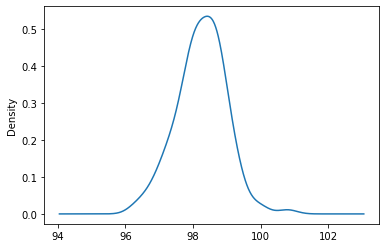

In [29]:
df.temperature.plot.density();

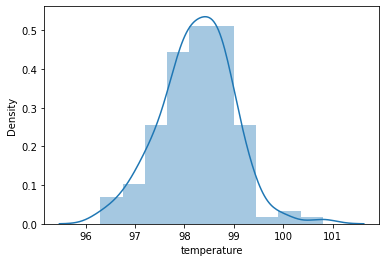

In [30]:
sns.distplot(df.temperature, hist=True, kde=True, bins=10);

⭐Investigate the given task by calculating the confidence interval for this sample of 130 subjects. (Use 90%, 95% and 99% CIs)

Output will look like this:

CI 90%: (98.14269432413488, 98.35576721432665)

CI 95%: (98.12200290560803, 98.3764586328535)

CI 99%: (98.08110824239758, 98.41735329606395)

In [31]:
#Collect lower limits in a list
lower = []

#Collect upper limits in a list
upper = []

for i in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(i, df=len(df)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
    lower.append(ci[0])
    upper.append(ci[1])
    print('CI {i}%: {interval}'.format(i=int(i*100), interval=ci))

CI 90%: (98.14269432413488, 98.35576721432665)
CI 95%: (98.12200290560803, 98.3764586328535)
CI 99%: (98.08110824239758, 98.41735329606395)


⭐Visualize confidence intervals by using visualization libraries. (Use 90%, 95% and 99% CIs)

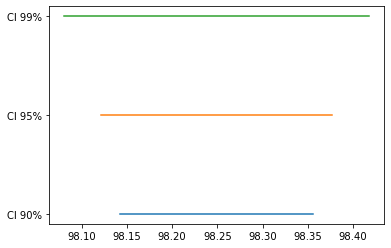

In [32]:
plt.plot((lower, upper), (range(len(lower)),range(len(upper))))
plt.yticks(range(3), ["CI 90%", "CI 95%", "CI 99%"])
plt.show()

The CIs don't include hypothesized mean (mu=98.6)

In [33]:
stats.t.interval(0.90, df=129, loc=df.temperature.mean(), scale=df.temperature.sem())

(98.14269432413488, 98.35576721432665)

In [34]:
stats.t.interval(0.95, df=129, loc=df.temperature.mean(), scale=df.temperature.sem())

(98.12200290560803, 98.3764586328535)

In [35]:
stats.t.interval(0.99, df=129, loc=df.temperature.mean(), scale=df.temperature.sem())

(98.08110824239758, 98.41735329606395)

⭐**Investigate the given task by using One Sample t Test.**

___🚀First, check the normality. *Use scipy.stats.shapiro

<i>H<i/><sub>0</sub>: "the variable is normally distributed"<br>
<i>H<i/><sub>1</sub>: "the variable is not normally distributed"

In [36]:
stats.shapiro(df.temperature)

ShapiroResult(statistic=0.9865769743919373, pvalue=0.2331680953502655)

In [37]:
# Create stat variable for Test Statistic and p variable for p-value
stat, p = stats.shapiro(df.temperature)

In [38]:
p

0.2331680953502655

In [39]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


___🚀Then, conduct the significance test. *Use scipy.stats.ttest_1samp*

In [40]:
#H0: mu = 98.6
#H1: mu =! 98.6

In [41]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [42]:
2 * stats.t.cdf(-5.454823292364077, df=129)

2.410632041561008e-07

The sample standard deviation is .73, so the standard error of the mean is .064. Thus the calculated t (using the sample mean of 98.25) is -5.45.

## Task-2. Is There a Significant Difference Between Males and Females in Normal Temperature?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [43]:
df.groupby("gender").describe()["temperature"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
male,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


⭐Plot the histogram for both groups side-by-side.

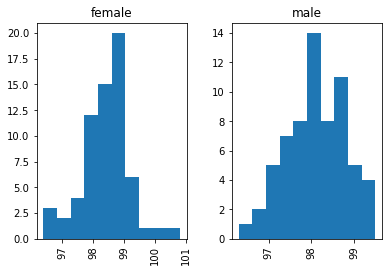

In [44]:
df.temperature.hist(by=df.gender);

⭐Plot the box plot for both groups side-by-side.

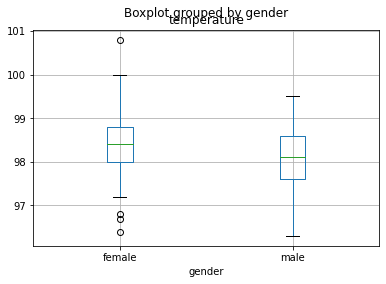

In [45]:
df.boxplot("temperature", by="gender");

⭐**Investigate the given task by using Independent Samples t Test.**

___🚀First, check the normality for both groups. *Use scipy.stats.shapiro*

In [46]:
#Check the normality for male group

stat, p = stats.shapiro(df[df["gender"]=="male"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.855
Sample looks Gaussian (fail to reject H0)


In [47]:
#Check the normality for female group

stat, p = stats.shapiro(df[df["gender"]=="female"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.090
Sample looks Gaussian (fail to reject H0)


___🚀Test the assumption of homogeneity of variance
*Hint: Levene’s Test*

The hypotheses for Levene’s test are: 

<i>H<i/><sub>0</sub>: "the population variances of group 1 and 2 are equal"
    
<i>H<i/><sub>1</sub>: "the population variances of group 1 and 2 are not equal"

In [48]:
stat, p = stats.levene(df[df["gender"]=="male"]["temperature"], df[df["gender"]=="female"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.064, p=0.801
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [49]:
df[df["gender"]=="female"]["temperature"]

65      96.4
66      96.7
67      96.8
68      97.2
69      97.2
       ...  
125     99.3
126     99.4
127     99.9
128    100.0
129    100.8
Name: temperature, Length: 65, dtype: float64

In [50]:
stats.ttest_ind(df[df["gender"]=="male"]["temperature"], df[df["gender"]=="female"]["temperature"], equal_var=True)

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.02393188312240236)

In [51]:
twosample = stats.ttest_ind(df[df["gender"]=="male"]["temperature"], df[df["gender"]=="female"]["temperature"], equal_var=True)

alpha = 0.05
p_value = twosample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


## Task-3. Is There a Relationship Between Body Temperature and Heart Rate?

⭐Plot the scatter plot

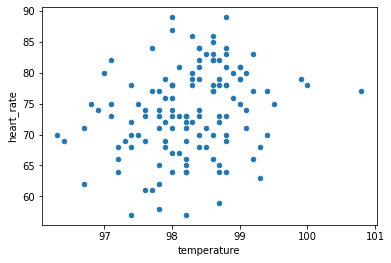

In [52]:
df.plot.scatter("temperature", "heart_rate");

⭐Check the normality for heart rate variable

In [53]:
stat, p = stats.shapiro(df["heart_rate"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.355
Sample looks Gaussian (fail to reject H0)


⭐**Conduct a correlation test**, report Pearson’s correlation coefficient and two-tailed p-value. *Use scipy.stats.pearsonr*

Two-tailed significance test:

H0: ρ = 0 ("the population correlation coefficient is 0; there is no association")

H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

In [54]:
stats.pearsonr(df.temperature, df.heart_rate)

(0.2536564027207642, 0.003591489250708227)

⭐**Find a regression equation** to predict heart rate from body temperature (Use scipy.stats).

In [55]:
res = stats.linregress(df.temperature, df.heart_rate)
res

LinregressResult(slope=2.443238038611885, intercept=-166.2847194182034, rvalue=0.2536564027207643, pvalue=0.003591489250708216, stderr=0.8235190209144222, intercept_stderr=80.91234585505099)

In [56]:
res.slope

2.443238038611885

In [57]:
res.intercept

-166.2847194182034

In [58]:
# Regression equation -->  df.heart_rate = res.intercept + res.slope * df.temperature

⭐**Find a regression equation** to predict heart rate from body temperature (Use statsmodels).


In [59]:
import statsmodels.api as sm

In [60]:
X = df.temperature
Y = df.heart_rate

In [61]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [62]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             heart_rate   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.802
Date:                Fri, 03 Dec 2021   Prob (F-statistic):            0.00359
Time:                        06:59:19   Log-Likelihood:                -433.75
No. Observations:                 130   AIC:                             871.5
Df Residuals:                     128   BIC:                             877.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -166.2847     80.912     -2.055      

⭐Calculate the predicted heart rate of a person at the temperature 97 F.

In [63]:
temp = 97
res.intercept + res.slope * temp

70.70937032714943

⭐How much of the variation of the heart_rate variable is explained by the temperature variable? *Coefficient of determination (R-squared):*

In [64]:
Rsquared = res.rvalue ** 2  #via correlation squared
Rsquared

0.06434157064123855

In [65]:
model.rsquared  #via statsmodels

0.06434157064123891

# Spring 2014 Semester Survey

## The Data

- This dataset contains survey results from 435 students enrolled at a university in the United States. The survey was conducted during the Spring 2014 semester.

- This data was simulated using random number generation.

- Source: Kent State University (https://www.kent.edu/)

- Data Description can be found at: https://libguides.library.kent.edu/ld.php?content_id=11205386

⭐Run the following code to read the dataset.

In [66]:
survey = pd.read_csv("students_2014.csv")

In [67]:
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


⭐Know your data

In [68]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ids           435 non-null    int64 
 1   bday          435 non-null    object
 2   enrolldate    435 non-null    object
 3   expgradate    435 non-null    object
 4   Rank          435 non-null    object
 5   Major         434 non-null    object
 6   Gender        435 non-null    object
 7   Athlete       435 non-null    int64 
 8   Height        435 non-null    object
 9   Weight        435 non-null    object
 10  Smoking       435 non-null    object
 11  Sprint        435 non-null    object
 12  MileMinDur    435 non-null    object
 13  English       435 non-null    object
 14  Reading       435 non-null    object
 15  Math          435 non-null    object
 16  Writing       435 non-null    object
 17  State         435 non-null    object
 18  LiveOnCampus  435 non-null    object
 19  HowCommu

⭐Change Math, English, Reading, and Writing colums to numeric. *Use pd.to_numeric*

In [69]:
survey["Math"] = pd.to_numeric(survey["Math"],errors='coerce')
survey["English"] = pd.to_numeric(survey["English"],errors='coerce')
survey["Reading"] = pd.to_numeric(survey["Reading"],errors='coerce')
survey["Writing"] = pd.to_numeric(survey["Writing"],errors='coerce')

## Task-1. Paired Samples t Test

The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the **English** and **Math** sections, and want to determine whether students tended to score higher on their English or Math test, on average. 

⭐Show descriptives for the two sections

In [70]:
survey.describe()[["English", "Math"]].T

,count,mean,std,min,25%,50%,75%,max
English,409.0,82.787555,6.839803,59.83,78.3300,83.150,87.1700,101.95
Math,422.0,65.468009,8.375930,35.32,60.2025,65.445,70.5675,93.78


⭐Plot the histogram for both groups side-by-side.

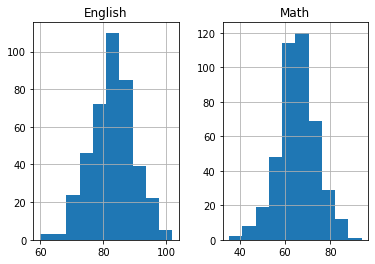

In [71]:
survey[["English", "Math"]].hist();

⭐Plot the box plot for both variables side-by-side.

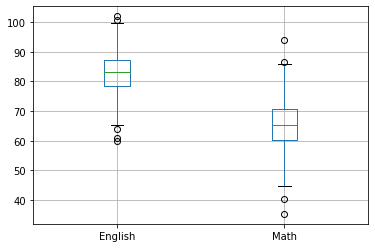

In [72]:
survey[["English", "Math"]].boxplot();

⭐Create a paired dataset as named *pairset*. Remove missing values. *Use dropna*

In [73]:
pairset = survey[["Math", "English"]].dropna()
pairset.head()

,Math,English
0,60.02,88.24
1,70.19,89.45
2,71.20,96.73
3,55.89,74.06
4,65.52,82.61


⭐Conduct the significance test. Use *scipy.stats.ttest_rel*

In [74]:
stats.ttest_rel(pairset.Math, pairset.English)

Ttest_relResult(statistic=-36.312568981719856, pvalue=3.0710987192210606e-128)

In [75]:
pairedtest = stats.ttest_rel(pairset.Math, pairset.English)

alpha = 0.05
p_value = pairedtest.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


⭐Compute pairwise correlation of sections (English, Reading, Math, and Writing), excluding NA/null values.

In [76]:
sections = ["Math", "English", "Reading", "Writing"]

sectionset = survey[sections].dropna()
sectionset.head()

,Math,English,Reading,Writing
0,60.02,88.24,81.50,81.44
1,70.19,89.45,85.25,73.27
2,71.20,96.73,86.88,84.24
3,55.89,74.06,88.68,73.16
4,65.52,82.61,77.30,80.45


In [77]:
sectionset.corr()

,Math,English,Reading,Writing
Math,1.000000,0.248545,0.518579,0.110113
English,0.248545,1.000000,0.338691,0.375107
Reading,0.518579,0.338691,1.000000,0.131742
Writing,0.110113,0.375107,0.131742,1.000000


# One-way ANOVA

In the sample dataset, the variable Sprint is the respondent's time (in seconds) to sprint a given distance, and Smoking is an indicator about whether or not the respondent smokes (0 = Nonsmoker, 1 = Past smoker, 2 = Current smoker). Let's use ANOVA to test if there is a statistically significant difference in sprint time with respect to smoking status. Sprint time will serve as the dependent variable, and smoking status will act as the independent variable.

The null and alternative hypotheses of one-way ANOVA can be expressed as:

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

In [78]:
oneway = ["Sprint", "Smoking"]

onewayset = survey[oneway].dropna()
onewayset.head()

,Sprint,Smoking
0,7.978,0
1,8.004,0
2,,0
3,8.473,
4,,2


⭐Change Math, Sprint and Smoking columns to numeric. *Use pd.to_numeric*

In [79]:
onewayset["Sprint"] = pd.to_numeric(survey["Sprint"],errors='coerce')
onewayset["Smoking"] = pd.to_numeric(survey["Smoking"],errors='coerce')

In [80]:
onewayset["Smoking"] = onewayset["Smoking"].astype('category')

⭐Replace the Smoking levels [1, 2, 3]  with ["Nonsmoker", "Past smoker","Current smoker"]

In [81]:
onewayset["Smoking"] = onewayset["Smoking"].replace([0,1,2],["Nonsmoker", "Past smoker","Current smoker"])

onewayset["Smoking"]

0           Nonsmoker
1           Nonsmoker
2           Nonsmoker
3                 NaN
4      Current smoker
            ...      
430         Nonsmoker
431         Nonsmoker
432         Nonsmoker
433    Current smoker
434       Past smoker
Name: Smoking, Length: 435, dtype: object

In [82]:
onewayset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sprint   374 non-null    float64
 1   Smoking  411 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


⭐Descriptive for each group

In [83]:
onewayset.groupby("Smoking").describe()["Sprint"]

,count,mean,std,min,25%,50%,75%,max
Smoking,,,,,,,,
Current smoker,59.0,7.120915,1.083500,5.295,6.2925,7.013,7.983,9.475
Nonsmoker,261.0,6.411487,1.251783,4.503,5.3600,6.326,7.337,9.597
Past smoker,33.0,6.835333,1.024415,4.889,6.0750,6.876,7.706,8.549


In [84]:
nonsmoker = onewayset[onewayset["Smoking"]=="Nonsmoker"]["Sprint"].dropna()
pastsmoker = onewayset[onewayset["Smoking"]=="Past smoker"]["Sprint"].dropna()
currentsmoker = onewayset[onewayset["Smoking"]=="Current smoker"]["Sprint"].dropna()

⭐Check normality assumption for each group

In [85]:
stat, p = stats.shapiro(currentsmoker)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.137
Sample looks Gaussian (fail to reject H0)


⭐Run One-way ANOVA. *Use scipy.stats.f_oneway*

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

In [86]:
stats.f_oneway(nonsmoker, pastsmoker, currentsmoker)

F_onewayResult(statistic=9.208599845380919, pvalue=0.00012659768158159465)

In [87]:
anova = stats.f_oneway(nonsmoker, pastsmoker, currentsmoker)

alpha = 0.05
p_value = anova.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


*You can do post-hoc test on your own if you'd like*